# Predicting equipment failures

### Table 46

### Anton Leontyev, Madi Muse, Sebastian Monroe

## Data import and cleaning

In [1]:
import pandas as pd
import os 
import numpy as np

In [2]:
arr = os.listdir()
print(arr)

['classifier.json', 'classifier.h5', 'Conoco Competition3.ipynb', '.DS_Store', 'Conoco Competition2.ipynb', 'submission.csv', 'equip_failures_training_set.csv', 'submission1.csv', 'Conoco Competition4.ipynb', 'submission2.csv', 'Conoco Competition.ipynb', 'pickled_decision_tree.pkl', 'classifier.hdf5', 'Conoco Competition3.pdf', 'equip_failures_test_set.csv', '.ipynb_checkpoints']


In [3]:
df_train = pd.read_csv('equip_failures_training_set.csv')
df_test = pd.read_csv('equip_failures_test_set.csv')

Let's inspect the dataset:

In [4]:
df_train

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,...,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996,0,153002,na,664,186,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,59997,0,2286,na,2130706538,224,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,59998,0,112,0,2130706432,18,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,59999,0,80292,na,2130706432,494,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


Let's see what columns do we have:

In [5]:
list(df_train)

['id',
 'target',
 'sensor1_measure',
 'sensor2_measure',
 'sensor3_measure',
 'sensor4_measure',
 'sensor5_measure',
 'sensor6_measure',
 'sensor7_histogram_bin0',
 'sensor7_histogram_bin1',
 'sensor7_histogram_bin2',
 'sensor7_histogram_bin3',
 'sensor7_histogram_bin4',
 'sensor7_histogram_bin5',
 'sensor7_histogram_bin6',
 'sensor7_histogram_bin7',
 'sensor7_histogram_bin8',
 'sensor7_histogram_bin9',
 'sensor8_measure',
 'sensor9_measure',
 'sensor10_measure',
 'sensor11_measure',
 'sensor12_measure',
 'sensor13_measure',
 'sensor14_measure',
 'sensor15_measure',
 'sensor16_measure',
 'sensor17_measure',
 'sensor18_measure',
 'sensor19_measure',
 'sensor20_measure',
 'sensor21_measure',
 'sensor22_measure',
 'sensor23_measure',
 'sensor24_histogram_bin0',
 'sensor24_histogram_bin1',
 'sensor24_histogram_bin2',
 'sensor24_histogram_bin3',
 'sensor24_histogram_bin4',
 'sensor24_histogram_bin5',
 'sensor24_histogram_bin6',
 'sensor24_histogram_bin7',
 'sensor24_histogram_bin8',
 'sens

What types are these columns?

In [6]:
df_train.dtypes

id                           int64
target                       int64
sensor1_measure              int64
sensor2_measure             object
sensor3_measure             object
                             ...  
sensor105_histogram_bin7    object
sensor105_histogram_bin8    object
sensor105_histogram_bin9    object
sensor106_measure           object
sensor107_measure           object
Length: 172, dtype: object

Object means they need to be coerced to the numerical variables; 
They are listed as object because na are parsed as strings.

In [7]:
df_train1 = df_train.apply(pd.to_numeric, errors='coerce')
df_train1.dtypes

id                            int64
target                        int64
sensor1_measure               int64
sensor2_measure             float64
sensor3_measure             float64
                             ...   
sensor105_histogram_bin7    float64
sensor105_histogram_bin8    float64
sensor105_histogram_bin9    float64
sensor106_measure           float64
sensor107_measure           float64
Length: 172, dtype: object

In [8]:
df_train1.fillna(0) # we can consider no reading as reading with value 0

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,2,0,33058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,3,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,4,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,5,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996,0,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,59997,0,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,59998,0,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,59999,0,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


Now, let's aggregate the continous sensor recordings. The simplest aggregation is averaging.


In [9]:
sensor7 = ['sensor7_histogram_bin0',
 'sensor7_histogram_bin1',
 'sensor7_histogram_bin2',
 'sensor7_histogram_bin3',
 'sensor7_histogram_bin4',
 'sensor7_histogram_bin5',
 'sensor7_histogram_bin6',
 'sensor7_histogram_bin7',
 'sensor7_histogram_bin8',
 'sensor7_histogram_bin9']
sensor24 = ['sensor24_histogram_bin0',
 'sensor24_histogram_bin1',
 'sensor24_histogram_bin2',
 'sensor24_histogram_bin3',
 'sensor24_histogram_bin4',
 'sensor24_histogram_bin5',
 'sensor24_histogram_bin6',
 'sensor24_histogram_bin7',
 'sensor24_histogram_bin8',
 'sensor24_histogram_bin9']
sensor25 = ['sensor25_histogram_bin0',
 'sensor25_histogram_bin1',
 'sensor25_histogram_bin2',
 'sensor25_histogram_bin3',
 'sensor25_histogram_bin4',
 'sensor25_histogram_bin5',
 'sensor25_histogram_bin6',
 'sensor25_histogram_bin7',
 'sensor25_histogram_bin8',
 'sensor25_histogram_bin9']
sensor26 = ['sensor26_histogram_bin0',
 'sensor26_histogram_bin1',
 'sensor26_histogram_bin2',
 'sensor26_histogram_bin3',
 'sensor26_histogram_bin4',
 'sensor26_histogram_bin5',
 'sensor26_histogram_bin6',
 'sensor26_histogram_bin7',
 'sensor26_histogram_bin8',
 'sensor26_histogram_bin9']
sensor64 = ['sensor64_histogram_bin0',
 'sensor64_histogram_bin1',
 'sensor64_histogram_bin2',
 'sensor64_histogram_bin3',
 'sensor64_histogram_bin4',
 'sensor64_histogram_bin5',
 'sensor64_histogram_bin6',
 'sensor64_histogram_bin7',
 'sensor64_histogram_bin8',
 'sensor64_histogram_bin9']
sensor69 = ['sensor69_histogram_bin0',
 'sensor69_histogram_bin1',
 'sensor69_histogram_bin2',
 'sensor69_histogram_bin3',
 'sensor69_histogram_bin4',
 'sensor69_histogram_bin5',
 'sensor69_histogram_bin6',
 'sensor69_histogram_bin7',
 'sensor69_histogram_bin8',
 'sensor69_histogram_bin9']
sensor105 = ['sensor105_histogram_bin0',
 'sensor105_histogram_bin1',
 'sensor105_histogram_bin2',
 'sensor105_histogram_bin3',
 'sensor105_histogram_bin4',
 'sensor105_histogram_bin5',
 'sensor105_histogram_bin6',
 'sensor105_histogram_bin7',
 'sensor105_histogram_bin8',
 'sensor105_histogram_bin9']
df_train1['sensor7_average'] = df_train1[sensor7].mean(axis=1)
df_train1['sensor24_average'] = df_train1[sensor24].mean(axis=1)
df_train1['sensor25_average'] = df_train1[sensor25].mean(axis=1)
df_train1['sensor26_average'] = df_train1[sensor26].mean(axis=1)
df_train1['sensor64_average'] = df_train1[sensor64].mean(axis=1)
df_train1['sensor69_average'] = df_train1[sensor69].mean(axis=1)
df_train1['sensor105_average'] = df_train1[sensor105].mean(axis=1)


Now that we created the averaged columns, let's simplify the data a little bit and get rid of histogram values. 

In [10]:
not_hists = [col for col in df_train1.columns if not  'histogram' in col]
df_train_2 = df_train1[not_hists]

Are classes balanced in our dataset? Let's count how many instances of "1" do we have in our dataset

In [11]:
df_train_2['target'].astype(bool).sum(axis=0)

1000

## Transforming the data

Recall that we have 60000 rows total. Only 1000 instances of class 2 (underground failures, coded 1), while we have 59000 instances of class 1 (surface-related, coded 0). This is clearly a problem, because any model trained for predicting will achieve great accuracy. But this accuracy would actually be moot - the model will effectively be predicting one class.

A techinque to somewhat combat it can be found in resampling. More accurately, we can "upsample" the underrepresented dataset by performing sampling with replacement. This technique is also known as bootstrapping. We will upsample the dataset to make it even.

In [13]:
df_majority = df_train_2[df_train_2.target==0]
df_minority = df_train_2[df_train_2.target==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=59000)    # to match majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.target.value_counts()

1    59000
0    59000
Name: target, dtype: int64

Now the classes are balanced.

In [14]:
df_upsampled = df_upsampled.fillna(0)
y = df_upsampled.target
X = df_upsampled.drop(['target','id'], axis=1)

Now, let's evaluate how different models fare on accuracy

In [15]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver wi

LR: 0.941492 (0.015228)


/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/agleontiev/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are

LDA: 0.903924 (0.048571)
KNN: 0.990246 (0.009781)
CART: 0.996754 (0.003309)
NB: 0.925153 (0.039405)


Let's visualize the results of our model comparison, with y-axis representing accuracy

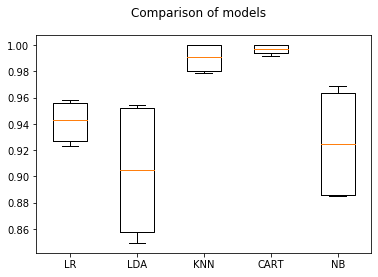

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
fig.suptitle('Comparison of models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It is evident from this picture that CART has the smallest variability and the highest accuracy. So, we will use CART as our model of choice.

In [117]:
#split dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
model = DecisionTreeClassifier()
fitted_model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Accuracy:",accuracy_score(y_test, y_predict))
print("F-1 score:", f1_score(y_test, y_predict))

Accuracy: 0.9963135593220339
F-1 score: 0.9963274093461101


Prediction accuracy and F-1 is very high, but is our model is not predicting just one class?

In [124]:
import collections

print(collections.Counter(y_predict))


Counter({1: 11888, 0: 11712})


Finally, let's create a confusion matrix. Confusion matrix  tells contrasts prediction of different classes and allows to better evaluate the performance.

In [125]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Surface Failure', 'Predicted Underground failure'],
    index=['True Surface failure', 'True Underground failure']
)

,Predicted Surface Failure,Predicted Underground failure
True Surface failure,11712,87
True Underground failure,0,11801


Save the model to use it later.

In [126]:
import pickle
pkl_filename = "pickled_decision_tree.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Applying the model to the test data

Finally, let's make our predictions using test data. For that, we need to apply the same transformations to the test data.

In [127]:
df_test2 = df_test

df_test2 = df_test2.apply(pd.to_numeric, errors='coerce')
df_test2.dtypes

id                            int64
sensor1_measure               int64
sensor2_measure             float64
sensor3_measure             float64
sensor4_measure             float64
                             ...   
sensor105_histogram_bin7    float64
sensor105_histogram_bin8    float64
sensor105_histogram_bin9    float64
sensor106_measure           float64
sensor107_measure           float64
Length: 171, dtype: object

In [128]:
sensor7 = ['sensor7_histogram_bin0',
 'sensor7_histogram_bin1',
 'sensor7_histogram_bin2',
 'sensor7_histogram_bin3',
 'sensor7_histogram_bin4',
 'sensor7_histogram_bin5',
 'sensor7_histogram_bin6',
 'sensor7_histogram_bin7',
 'sensor7_histogram_bin8',
 'sensor7_histogram_bin9']
sensor24 = ['sensor24_histogram_bin0',
 'sensor24_histogram_bin1',
 'sensor24_histogram_bin2',
 'sensor24_histogram_bin3',
 'sensor24_histogram_bin4',
 'sensor24_histogram_bin5',
 'sensor24_histogram_bin6',
 'sensor24_histogram_bin7',
 'sensor24_histogram_bin8',
 'sensor24_histogram_bin9']
sensor25 = ['sensor25_histogram_bin0',
 'sensor25_histogram_bin1',
 'sensor25_histogram_bin2',
 'sensor25_histogram_bin3',
 'sensor25_histogram_bin4',
 'sensor25_histogram_bin5',
 'sensor25_histogram_bin6',
 'sensor25_histogram_bin7',
 'sensor25_histogram_bin8',
 'sensor25_histogram_bin9']
sensor26 = ['sensor26_histogram_bin0',
 'sensor26_histogram_bin1',
 'sensor26_histogram_bin2',
 'sensor26_histogram_bin3',
 'sensor26_histogram_bin4',
 'sensor26_histogram_bin5',
 'sensor26_histogram_bin6',
 'sensor26_histogram_bin7',
 'sensor26_histogram_bin8',
 'sensor26_histogram_bin9']
sensor64 = ['sensor64_histogram_bin0',
 'sensor64_histogram_bin1',
 'sensor64_histogram_bin2',
 'sensor64_histogram_bin3',
 'sensor64_histogram_bin4',
 'sensor64_histogram_bin5',
 'sensor64_histogram_bin6',
 'sensor64_histogram_bin7',
 'sensor64_histogram_bin8',
 'sensor64_histogram_bin9']
sensor69 = ['sensor69_histogram_bin0',
 'sensor69_histogram_bin1',
 'sensor69_histogram_bin2',
 'sensor69_histogram_bin3',
 'sensor69_histogram_bin4',
 'sensor69_histogram_bin5',
 'sensor69_histogram_bin6',
 'sensor69_histogram_bin7',
 'sensor69_histogram_bin8',
 'sensor69_histogram_bin9']
sensor105 = ['sensor105_histogram_bin0',
 'sensor105_histogram_bin1',
 'sensor105_histogram_bin2',
 'sensor105_histogram_bin3',
 'sensor105_histogram_bin4',
 'sensor105_histogram_bin5',
 'sensor105_histogram_bin6',
 'sensor105_histogram_bin7',
 'sensor105_histogram_bin8',
 'sensor105_histogram_bin9']
df_test2['sensor7_average'] = df_test2[sensor7].mean(axis=1)
df_test2['sensor24_average'] = df_test2[sensor24].mean(axis=1)
df_test2['sensor25_average'] = df_test2[sensor25].mean(axis=1)
df_test2['sensor26_average'] = df_test2[sensor26].mean(axis=1)
df_test2['sensor64_average'] = df_test2[sensor64].mean(axis=1)
df_test2['sensor69_average'] = df_test2[sensor69].mean(axis=1)
df_test2['sensor105_average'] = df_test2[sensor105].mean(axis=1)


In [129]:
list(df_test2)

['id',
 'sensor1_measure',
 'sensor2_measure',
 'sensor3_measure',
 'sensor4_measure',
 'sensor5_measure',
 'sensor6_measure',
 'sensor7_histogram_bin0',
 'sensor7_histogram_bin1',
 'sensor7_histogram_bin2',
 'sensor7_histogram_bin3',
 'sensor7_histogram_bin4',
 'sensor7_histogram_bin5',
 'sensor7_histogram_bin6',
 'sensor7_histogram_bin7',
 'sensor7_histogram_bin8',
 'sensor7_histogram_bin9',
 'sensor8_measure',
 'sensor9_measure',
 'sensor10_measure',
 'sensor11_measure',
 'sensor12_measure',
 'sensor13_measure',
 'sensor14_measure',
 'sensor15_measure',
 'sensor16_measure',
 'sensor17_measure',
 'sensor18_measure',
 'sensor19_measure',
 'sensor20_measure',
 'sensor21_measure',
 'sensor22_measure',
 'sensor23_measure',
 'sensor24_histogram_bin0',
 'sensor24_histogram_bin1',
 'sensor24_histogram_bin2',
 'sensor24_histogram_bin3',
 'sensor24_histogram_bin4',
 'sensor24_histogram_bin5',
 'sensor24_histogram_bin6',
 'sensor24_histogram_bin7',
 'sensor24_histogram_bin8',
 'sensor24_histog

In [130]:
df_test3 = df_test2.fillna(0)
not_hists2 = [col for col in df_test3.columns if not  'histogram' in col]
df_test4 = df_test3[not_hists2]
df_test4

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor8_measure,sensor9_measure,sensor10_measure,...,sensor104_measure,sensor106_measure,sensor107_measure,sensor7_average,sensor24_average,sensor25_average,sensor26_average,sensor64_average,sensor69_average,sensor105_average
0,1,66888,0.0,2.130706e+09,332.0,0.0,0.0,1967396.0,119208.0,0.0,...,1134.0,0.0,0.0,446803.0,446803.0,446803.0,446803.0,446803.0,446803.0,446803.0
1,2,91122,0.0,0.000000e+00,0.0,0.0,0.0,3068120.0,0.0,0.0,...,0.0,0.0,0.0,623296.4,623296.4,623296.4,623296.4,623296.4,623296.4,623296.4
2,3,218924,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,224.0,...,0.0,0.0,0.0,1227540.6,1227540.6,1227540.6,1227540.6,1227540.6,1227540.6,1227540.6
3,4,16,0.0,3.000000e+01,28.0,0.0,0.0,2246.0,0.0,46.0,...,56.0,0.0,0.0,692.2,692.2,692.2,692.2,692.2,692.2,692.2
4,5,39084,0.0,1.054000e+03,1032.0,0.0,0.0,1213570.0,15120.0,0.0,...,2120.0,0.0,0.0,239978.2,239978.2,239978.2,239978.2,239978.2,239978.2,239978.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996,15997,40084,0.0,2.200000e+02,162.0,0.0,0.0,1289494.0,7152.0,56.0,...,1192.0,0.0,0.0,256450.4,256450.4,256450.4,256450.4,256450.4,256450.4,256450.4
15997,15998,102790,0.0,8.780000e+02,502.0,0.0,0.0,2728194.0,0.0,38.0,...,0.0,0.0,0.0,563989.4,563989.4,563989.4,563989.4,563989.4,563989.4,563989.4
15998,15999,50846,0.0,8.700000e+02,758.0,0.0,0.0,1925202.0,0.0,0.0,...,1758.0,0.0,0.0,377912.8,377912.8,377912.8,377912.8,377912.8,377912.8,377912.8
15999,16000,48,0.0,2.130706e+09,70.0,0.0,0.0,5534.0,0.0,0.0,...,58.0,0.0,0.0,1523.8,1523.8,1523.8,1523.8,1523.8,1523.8,1523.8


In [131]:
df_test5 = df_test4.drop(['id'], axis=1)
predictions = model.predict(df_test5)

Let's check how many instances of each class were predicted

In [132]:
import collections

collections.Counter(predictions)

Counter({0: 15695, 1: 306})

In [135]:
#sanity check:
15695 + 306

16001

In [136]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

Save the output in submission-ready format:

In [138]:
res_series = pd.Series(predictions)
headers = ['target']
res_series.index += 1 
res_series.index.name = 'id'
res_series.to_csv('submission5a.csv', header = headers)